<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid 

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality 

## Table of Content

1. **[Feature Transformation](#trans)**
2. **[Feature Selection](#sel)**
3. **[Model Validation](#cv)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

#### Load the first dataset and check the first two observations

In [2]:
# load your data
df=pd.read_csv('winequality-white.csv',sep=';')
# type your code here
df.head(2)

,fixed acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [5]:
df.shape

(4898, 12)

In [6]:
# check data types of variables
df.info()
# type your code here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### Let's begin with some hands-on practice exercises

<a id="trans"> </a>
## 1. Feature Transformation

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Skewness:  1.5769795029952025


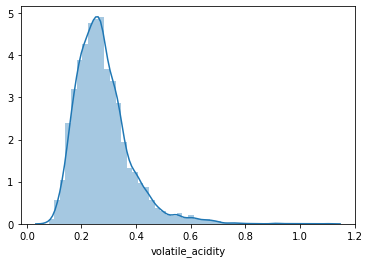

In [9]:
# type your code here
print('Skewness:',df['volatile_acidity'].skew())
sns.distplot(df['volatile_acidity'])

Transformed skewness: 0.13938315393329148


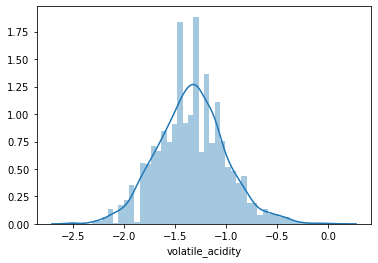

In [12]:
#The variable is having high skewness, so performing the log transformation
print('Transformed skewness:',np.log(df['volatile_acidity']).skew())
sns.distplot(np.log(df['volatile_acidity']))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

skewness: 1.0770937564240868


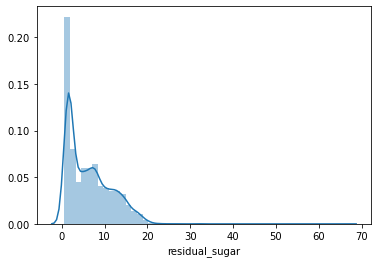

In [14]:
# type your code here
print('skewness:',df['residual_sugar'].skew())
sns.distplot(df['residual_sugar'])

skewness: -0.1611568975182972


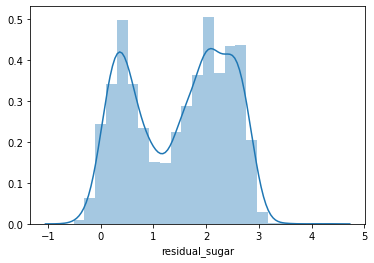

In [15]:
#The skewness is high. so performing log transformation
print('skewness:',np.log(df['residual_sugar']).skew())
sns.distplot(np.log(df['residual_sugar']))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
x=df.drop(columns='quality',axis=1)
x3=sm.add_constant(x)
y3=df['quality']
model3=sm.OLS(y3,x3).fit()

In [9]:
model3.rsquared

0.2818703641332869

In [10]:
model3.pvalues[model3.pvalues>0.05]

citric_acid             0.817589
chlorides               0.650973
total_sulfur_dioxide    0.449791
dtype: float64

The above attributes add no information to the model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [132]:
# type your code here
print('skewness:',df['alcohol'].skew())
print('log transformed skewness:',np.log(df['alcohol']).skew())
print('square root transformed:',np.sqrt(df['alcohol']).skew())
print('square root transformed:',np.exp(df['alcohol']).skew())

skewness: 0.4873419932161276
log transformed skewness: 0.310134622964236
square root transformed: 0.3978909427590142
square root transformed: 3.5917904382219787


Text(0.5, 1.0, 'Exponential transformed data')

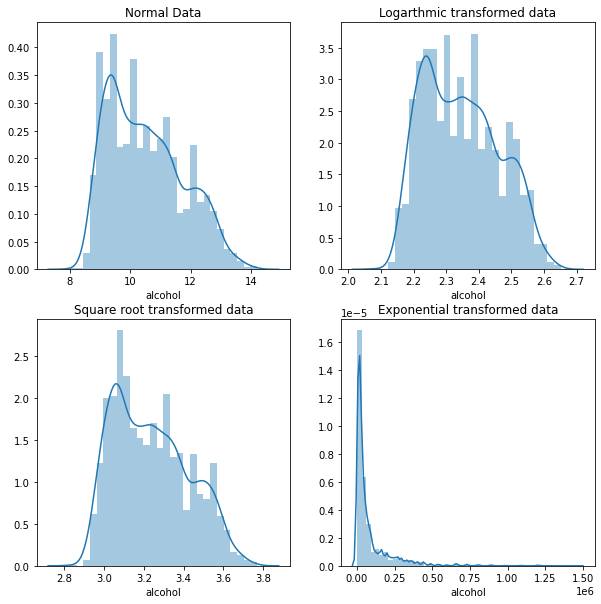

In [20]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(2,2,figsize=(10,10))
sns.distplot(df['alcohol'],ax=axs[0,0])
axs[0,0].set_title('Normal Data')
sns.distplot(np.log(df['alcohol']),ax=axs[0,1])
axs[0,1].set_title('Logarthmic transformed data')
sns.distplot(np.sqrt(df['alcohol']),ax=axs[1,0])
axs[1,0].set_title('Square root transformed data')
sns.distplot(np.exp(df['alcohol']),ax=axs[1,1])
axs[1,1].set_title('Exponential transformed data')

Log transformation is best suited to treat the skewness

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
ph_transform=pd.DataFrame(sc.fit_transform(df[['pH']]))
ph_transform.columns=['PH']
x5=df.drop(columns=['pH','quality'],axis=1)
x5=pd.concat([x5,ph_transform],axis=1)
x5=sm.add_constant(x5)
y5=df['quality']
model5=sm.OLS(y5,x5).fit()
print('Scaled PH model performance:',model5.rsquared)
print('Unscaled PH model performance:',model3.rsquared)

Scaled PH model performance: 0.2818703641332848
Unscaled PH model performance: 0.2818703641332869


Scaling the feature PH has no improvement in the performance of the model compared to general model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
x.shape , df.shape

((4898, 11), (4898, 12))

In [40]:
# type your code here
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.DataFrame([vif],columns=x.columns)

,fixed acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,92.861483,9.730569,10.007114,3.830272,6.497448,9.261556,24.980802,1056.497431,609.861725,20.527123,118.707368


From above, the columns volatile_acidity and free_sulfur_dioxide has same vif rate. So there is multicollinearity. By dropping the volatile_acidity column, multicollinearity can be removed

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.  Fit a full model. Is the assumption for normality of residuals violated ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

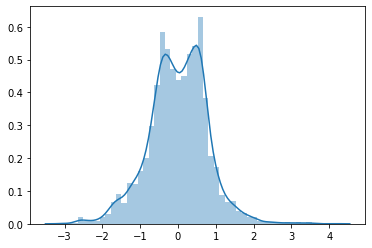

In [41]:
x7=x.drop(columns='volatile_acidity',axis=1)
x7=sm.add_constant(x7)
y7=df['quality']
model7=sm.OLS(y7,x7).fit()
y7_pred=model7.predict(x7)
sns.distplot(y7_pred-y7)

The residuals are normally distributed. So the rule is not violated

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

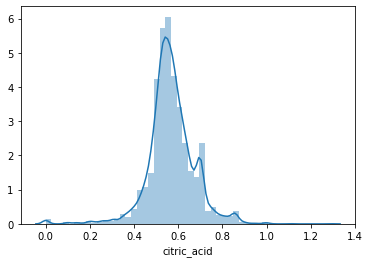

In [5]:
sns.distplot(np.sqrt(df['citric_acid']))

In [11]:
# type your code here
#Performing sqrt transformation as log transformation resulting in infinity due to presence of 0 in the data
citric_trans=pd.DataFrame(np.sqrt(df[['citric_acid']]))
citric_trans.columns=['Citric_Acid']
x8=df.drop(columns=['citric_acid','quality'],axis=1)
x8=pd.concat([x8,citric_trans],axis=1)
x8=sm.add_constant(x8)
y8=df['quality']
model8=sm.OLS(y8,x8).fit()
print('Transformed citric acid model performance:',model8.rsquared)
print('Untransformed citric acid model performance:',model3.rsquared)

Transformed citric acid model performance: 0.28217208941548455
Untransformed citric acid model performance: 0.2818703641332869


Transforming the feature Citric acid has minute improvement in the performance of the model compared to general model

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

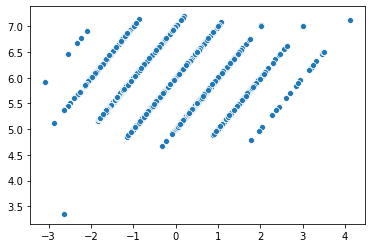

In [43]:
x9=df.drop('quality',axis=1)
y9=df['quality']
#Removing one column to avoid the multicollinearity
x9=x9.drop(columns='volatile_acidity',axis=1)
x9=sm.add_constant(x9)
model9=sm.OLS(y9,x9).fit()
y9_pred=model9.predict(x9)
res=y9_pred-y9
sns.scatterplot(res,y9_pred)

The points are linearly plotted. So the independent variables has linear relationship with Quality

<a id="sel"> </a>
## 2. Feature Selection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Find the top five significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using these five variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [120]:
# type your code here
from mlxtend.feature_selection import SequentialFeatureSelector
x10 = df.drop(columns='quality', axis = 1)
y10 = df['quality']
#store the LR algorithm in a variable
lr = LinearRegression()
linreg_forward3 = SequentialFeatureSelector(estimator = lr, k_features =5, forward = True, scoring = 'r2')
sfs_forward3 = linreg_forward3.fit(x10,y10)
print('Features selected using forward selection are: \n',sfs_forward3.k_feature_names_)
print('\nR-squared: ', sfs_forward3.k_score_)

Features selected using forward selection are: 
 ('volatile_acidity', 'residual_sugar', 'density', 'pH', 'alcohol')

R-squared:  0.24492882616341505


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Find the top five significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using these five variables.<br><br> Compare the R-squared value obtained from question 10 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [109]:
# type your code here
linreg_backward = SequentialFeatureSelector(estimator = lr, k_features =5, forward = False, scoring = 'r2')
sfs_backward = linreg_backward.fit(x10,y10)
print('Features selected using backward selection are: \n',sfs_backward.k_feature_names_)
print('\nR-squared: ', sfs_backward.k_score_)

Features selected using backward selection are: 
 ('volatile_acidity', 'residual_sugar', 'density', 'pH', 'alcohol')

R-squared:  0.24492882616341505


The rsquare obtained from forward selection and backward selection for the top 5 features is same

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Find the best set of significant variables from the dataset using forward selection technique such that the selected set should have 2 to 6 features. Also display the R-squared score for the model built using the selected variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [107]:
# type your code here
for i in range(2,7):
    linreg_Forward = SequentialFeatureSelector(estimator = lr, k_features =i, forward = True, scoring = 'r2')
    sfs_Forward = linreg_Forward.fit(x10,y10)
    print('\nTop {} Features selected using forward selection are: \n {}'.format(i,sfs_Forward.k_feature_names_))
    print('R-squared: ', sfs_Forward.k_score_)


Top 2 Features selected using forward selection are: 
 ('volatile_acidity', 'alcohol')
R-squared:  0.22414892843484208

Top 3 Features selected using forward selection are: 
 ('volatile_acidity', 'residual_sugar', 'alcohol')
R-squared:  0.2391357192155626

Top 4 Features selected using forward selection are: 
 ('volatile_acidity', 'residual_sugar', 'density', 'alcohol')
R-squared:  0.24266290978596902

Top 5 Features selected using forward selection are: 
 ('volatile_acidity', 'residual_sugar', 'density', 'pH', 'alcohol')
R-squared:  0.24492882616341505

Top 6 Features selected using forward selection are: 
 ('volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'density', 'pH', 'alcohol')
R-squared:  0.24672544391306497


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Find the best set of significant variables from the dataset using forward selection technique. Also display the R-squared score for the model built using the selected variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [111]:
linreg_forward1 = SequentialFeatureSelector(estimator = lr, k_features =7, forward = True, scoring = 'r2')
sfs_forward1 = linreg_forward1.fit(x10,y10)
print('Features selected using forward selection are: \n',sfs_forward1.k_feature_names_)
print('\nR-squared: ', sfs_forward1.k_score_)

Features selected using forward selection are: 
 ('volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol')

R-squared:  0.24706598333977453


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Find the best set of significant variables from the dataset using backward elimination technique. Also display the R-squared score for the model built using the selected variables. <br><br>Compare the R-squared value obtained from question 13 with the value obtained using backward elimination.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [112]:
# type your code here
linreg_backward1 = SequentialFeatureSelector(estimator = lr, k_features =7, forward = False, scoring = 'r2')
sfs_backward1 = linreg_backward1.fit(x10,y10)
print('Features selected using backward selection are: \n',sfs_backward1.k_feature_names_)
print('\nR-squared: ', sfs_backward1.k_score_)

Features selected using backward selection are: 
 ('volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol')

R-squared:  0.24706598333977453


The rsquare obtained from forward selection and backward selection for the top 7 features is same

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Find the best set of significant variables from the dataset among all the possible subsets of the variables. Build a linear regression model using the best subset and find the R-Squared value for that model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
# type your code here
column_names=sfs_backward1.k_feature_names_
x15=df.loc[:,column_names]
y15=df['quality']
LR=LinearRegression()
LR.fit(x15,y15)
LR.score(x15,y15)

0.2801195827165025

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Calculate the RMSE for the train set and test set for the model created using the top 5 variables obtained from forward selection in question 10. Check if the model is overfitted on the train set or not. If yes, then why do you think so?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [127]:
# type your code here
x16 = df.loc[:,sfs_forward3.k_feature_names_]
y16 = df['quality']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x16,y16,test_size=0.3,random_state=3)
lr4=LinearRegression()
lr4.fit(x_train,y_train)
print('Training data score:',lr4.score(x_train,y_train))
print('Test data score:',lr4.score(x_test,y_test))
y_train_pred=lr4.predict(x_train)
y_test_pred=lr4.predict(x_test)

Training data score: 0.2711255243139743
Test data score: 0.2702125464729478


In [129]:
from sklearn.metrics import mean_squared_error
rmse_train=mean_squared_error(y_train,y_train_pred)**0.5
rmse_test=mean_squared_error(y_test,y_test_pred)**0.5
rmse_test, rmse_train

(0.7667297721961732, 0.7515617033480699)

The rmse values for both train and test data are similar. so the model is not overfitted

<a id="cv"> </a>
## 3. Model Validation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Create a new feature based on the 'pH' which tells whether wine is acidic, basic or neutral. Will this variable significantly contribute to the model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [64]:
# type your code here
for i in range(df.shape[0]):
    if df.loc[i,'fixed acidity']>8:
        df.loc[i,'fixed acidity_new']=0
    elif df.loc[i,'fixed acidity']<7 :
        df.loc[i,'fixed acidity_new']=1
    else:
        df.loc[i,'fixed acidity_new']=2
        
df['fixed acidity_new'].unique()       

array([2, 1, 0], dtype=object)

In [66]:
df['fixed acidity_new']=df['fixed acidity_new'].astype(float)

In [72]:
x17=df.drop(columns=['quality'],axis=1)
x17=sm.add_constant(x17)
y17=df['quality']
model17=sm.OLS(y17,x17).fit()
model17.pvalues['fixed acidity_new']

2.6475864715004703e-07

The new variable 'fixed acidity_new' has high significance with the output variable. since the pvalue<0.05

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Fit the a full model. Validate the model using cross validation method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [73]:
# type your code here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
model18=lr.fit(x17,y17)

In [75]:
cv=cross_val_score(lr,x17,y17,scoring='r2',cv=5,n_jobs=-1,verbose=2)
cv

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


array([0.20448379, 0.29291335, 0.28177709, 0.30351353, 0.16504471])

In [79]:
model18.score(x17,y17)

0.2857545956985085

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Fit the a full model. Validate the model using 5 - fold cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [82]:
# type your code here
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=2)
cv=cross_val_score(lr,x17,y17,scoring='r2',cv=kf)
cv

array([0.24758359, 0.29188081, 0.26959158, 0.28821129, 0.29184228])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Fit the a full model. Validate the model using leave one out cross validation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [87]:
# type your code here

#Pending
from sklearn.model_selection import LeaveOneOut
lv=LeaveOneOut()
cv=cross_val_score(lr,x17,y17,scoring='neg_mean_squared_error',cv=lv)
cv

array([-0.14568816, -0.63869513, -0.12423595, ..., -0.45423213,
       -0.19590405, -0.11214231])